In [3]:
pip install statsforecast


  Using cached statsforecast-1.7.5-py3-none-any.whl.metadata (27 kB)
  Using cached coreforecast-0.0.9-py3-none-win_amd64.whl.metadata (3.4 kB)
  Using cached fugue-0.9.0-py3-none-any.whl.metadata (18 kB)
  Using cached utilsforecast-0.1.10-py3-none-any.whl.metadata (7.4 kB)
  Using cached triad-0.9.6-py3-none-any.whl.metadata (6.2 kB)
  Using cached adagio-0.2.4-py3-none-any.whl.metadata (1.8 kB)
  Using cached fs-2.4.16-py2.py3-none-any.whl.metadata (6.3 kB)
Using cached statsforecast-1.7.5-py3-none-any.whl (133 kB)
Using cached coreforecast-0.0.9-py3-none-win_amd64.whl (94 kB)
Using cached fugue-0.9.0-py3-none-any.whl (278 kB)
Using cached utilsforecast-0.1.10-py3-none-any.whl (40 kB)
Using cached adagio-0.2.4-py3-none-any.whl (26 kB)
Using cached triad-0.9.6-py3-none-any.whl (62 kB)
Using cached fs-2.4.16-py2.py3-none-any.whl (135 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mlforecast

  Using cached mlforecast-0.13.0-py3-none-any.whl.metadata (11 kB)
  Using cached optuna-3.6.1-py3-none-any.whl.metadata (17 kB)
  Using cached window_ops-0.0.15-py3-none-any.whl.metadata (6.8 kB)
  Using cached alembic-1.13.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.5-py3-none-any.whl.metadata (2.9 kB)
Using cached mlforecast-0.13.0-py3-none-any.whl (65 kB)
Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
Using cached window_ops-0.0.15-py3-none-any.whl (15 kB)
Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
Using cached colorlog-6.8.2-py3-none-any.whl (11 kB)
Using cached Mako-1.3.5-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
pip install nixtlats

  Using cached nixtlats-0.5.1-py3-none-any.whl.metadata (4.8 kB)
Using cached nixtlats-0.5.1-py3-none-any.whl (71 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from nixtlats import TimeGPT

c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\nixtlats\__init__.py:5: FutureWarning: This package is deprecated, please install nixtla instead.
  warnings.warn("This package is deprecated, please install nixtla instead.", category=FutureWarning)


In [2]:
file_path = "walmart.csv"
df = pd.read_csv(file_path)

#Covert Date into Datetime Format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set "Date" column as index
df.set_index('Date', inplace=True)

# Resample data into Weekly frequency. Although this is not required. Keeping it so that one can change into 'MS' if needed.
df_resampled = df.resample('W').sum()

df_resampled.reset_index(inplace=True)

df_resampled = df_resampled[["Date","Weekly_Sales"]]

print(df_resampled.head())

        Date  Weekly_Sales
0 2010-02-07   49750740.50
1 2010-02-14   48336677.63
2 2010-02-21   48276993.78
3 2010-02-28   43968571.13
4 2010-03-07   46871470.30


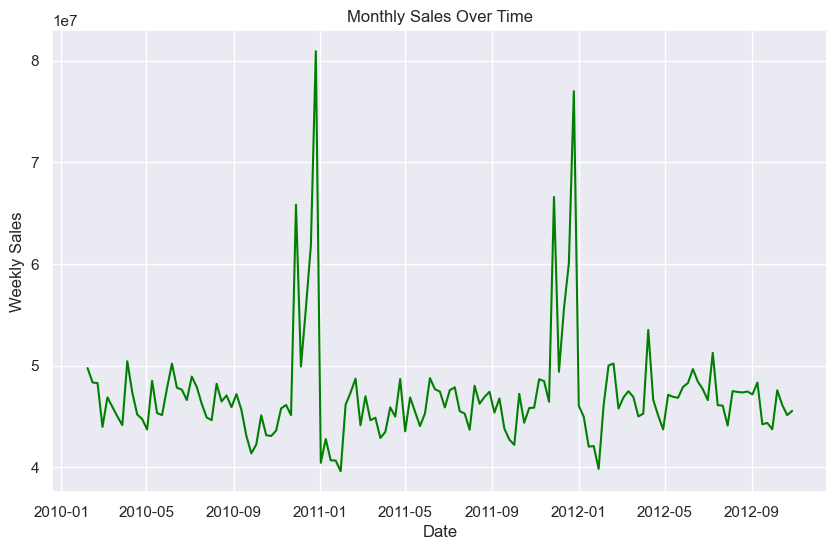

In [3]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y='Weekly_Sales', data=df_resampled, color='green')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

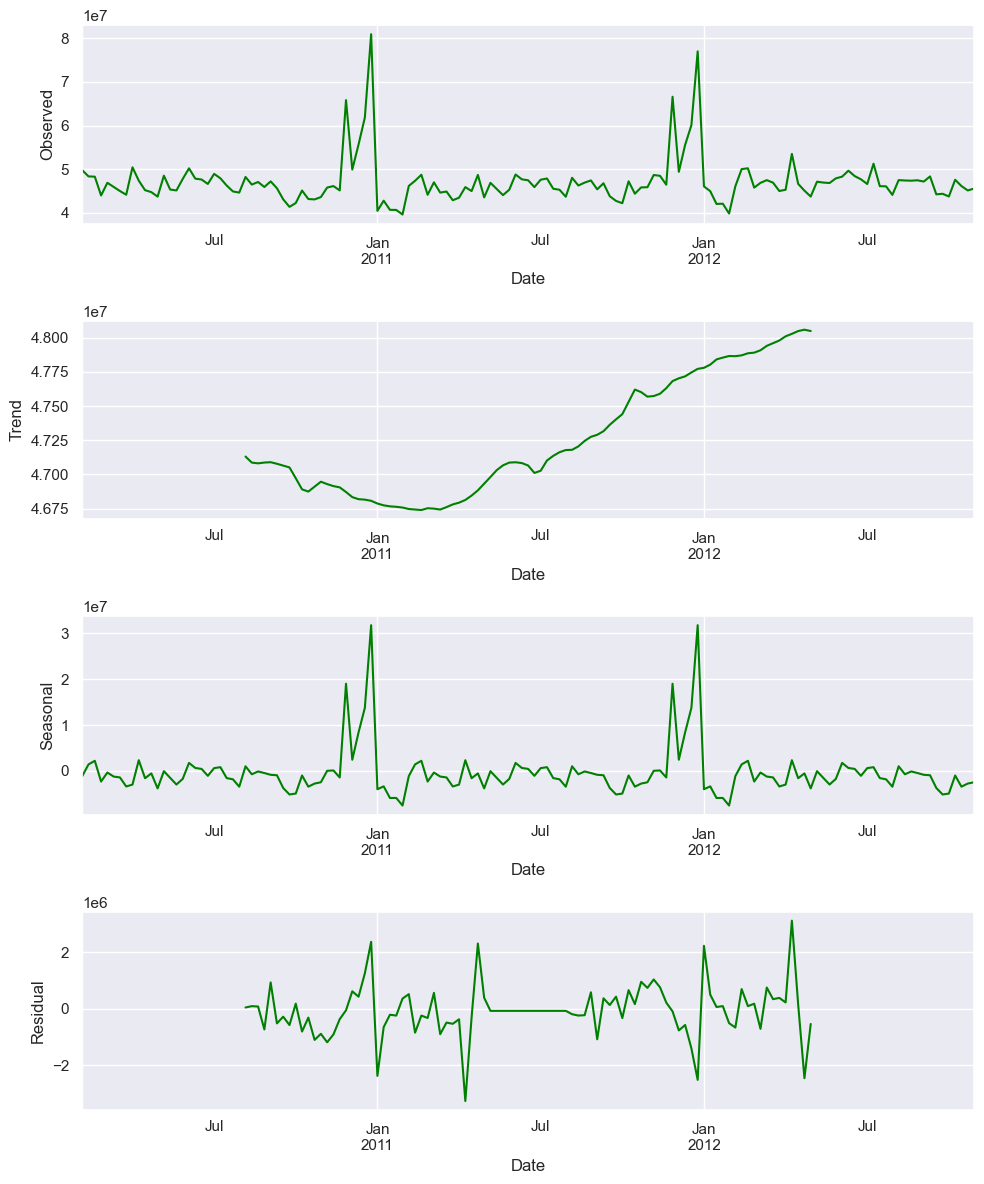

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df_resampled.set_index('Date', inplace=True)
result = seasonal_decompose(df_resampled['Weekly_Sales'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

result.observed.plot(ax=ax1, color='green')
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, color='green')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, color='green')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, color='green')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

df_resampled.reset_index(inplace=True)

In [5]:
train_size = int(len(df_resampled) * 0.8)
train, test = df_resampled.iloc[:train_size], df_resampled.iloc[train_size:]

print(f'Train set size: {len(train)}')
print(f'Test set size: {len(test)}')

Train set size: 114
Test set size: 29


In [6]:
train_ = pd.DataFrame({'unique_id':[1]*len(train),'ds': train["Date"], "y":train["Weekly_Sales"]})
test_ = pd.DataFrame({'unique_id':[1]*len(test),'ds': test["Date"], "y":test["Weekly_Sales"]})

sf = StatsForecast(models = [AutoARIMA(season_length = 52)],freq = 'W')

sf.fit(train_)
sf_prediction = sf.predict(h=len(test))
sf_prediction.rename(columns={'ds': 'Date'}, inplace=True)

c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [7]:
models = [LinearRegression(),
    lgb.LGBMRegressor(verbosity=-1),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]
@njit
def rolling_mean_7(x):
    return rolling_mean(x, window_size=7)
@njit
def rolling_mean_14(x):
    return rolling_mean(x, window_size=14)
    
#Defining the Model Parameters
fcst = MLForecast(models=models,freq='W',lags=[7,14,28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_7, rolling_mean_14],
        14: [rolling_mean_7, rolling_mean_14]
    },
    date_features=['year', 'month', 'day', 'dayofweek', 'quarter', 'week'],
    target_transforms=[Differences([7])])
    
#Fitting the Model and Generating Forecasts
fcst.fit(train_)
ml_prediction = fcst.predict(len(test_))
ml_prediction.rename(columns={'ds': 'Date'}, inplace=True)

In [ ]:
#Importing TimeGPT
from nixtlats import TimeGPT

In [ ]:
os.environ['TIMEGPT_TOKEN'] = "Your Token"
timegpt = TimeGPT(token=os.environ['TIMEGPT_TOKEN'])

In [ ]:
timegpt.plot(df_resampled, time_col='Date', target_col='Weekly_Sales')

In [ ]:
timegpt_fcst = timegpt.forecast(df=train, h=len(test), time_col='Date', target_col='Weekly_Sales', freq='W')
print(timegpt_fcst.head())

In [ ]:
result = test.copy()
result.drop("index", axis=1, inplace=True)
result.set_index("Date", inplace=True)
result["AutoARIMA_fcst"]=sf_prediction["AutoARIMA"].values
result["LinearRegression_fcst"]=ml_prediction["LinearRegression"].values
result["LGBM_fcst"]=ml_prediction["LGBMRegressor"].values
result["XGB_fcst"]=ml_prediction["XGBRegressor"].values
result["RandomForest_fcst"]=ml_prediction["RandomForestRegressor"].values
result["TimeGPT_fcst"]=timegpt_fcst["TimeGPT"].values
print(result.head())

In [ ]:
def calculate_error_metrics(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    metrics_dict = {
        'MAE': np.mean(np.abs(actual_values - predicted_values)),
        'RMSE': np.sqrt(np.mean((actual_values - predicted_values)**2)),
        'MAPE': np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100,
        'SMAPE': 100 * np.mean(2 * np.abs(predicted_values - actual_values) / (np.abs(predicted_values) + np.abs(actual_values))),
        'MdAPE': np.median(np.abs((actual_values - predicted_values) / actual_values)) * 100,
        'GMRAE': np.exp(np.mean(np.log(np.abs(actual_values - predicted_values) / actual_values)))
    }

    result_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])
    return result_df

# Extract 'Weekly_Sales' as actuals
actuals = result['Weekly_Sales']


error_metrics_dict = {}


for col in result.columns[1:]:  # Exclude 'Weekly_Sales'
    predicted_values = result[col]
    error_metrics_dict[col] = calculate_error_metrics(actuals, predicted_values)['Value'].values  # Extracting 'Value' column


error_metrics_df = pd.DataFrame(error_metrics_dict)
error_metrics_df.insert(0, 'Metric', calculate_error_metrics(actuals, actuals)['Metric'].values)  # Adding 'Metric' column


print(error_metrics_df)

In [ ]:
# Set seaborn style to darkgrid
sns.set(style="darkgrid")

# Create subplots for each prediction column
num_cols = len(result.columns[1:])
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 6 * num_cols))

# Loop through each prediction column and plot on separate subplot
for i, col in enumerate(result.columns[1:]):  # Exclude 'Weekly_Sales'
    axes[i].plot(result.index, result['Weekly_Sales'], label='Weekly Sales', color='green')
    axes[i].plot(result.index, result[col], label=col, color='blue')
    axes[i].set_title(f'Weekly Sales vs {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()